# **Random forest**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
df = pd.read_csv("consumo_202307.csv", encoding="Latin-1", delimiter=";")
df.head(n=15)

,FECHA_CORTE,PERIODO_FACTURACION,UUID,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,LOCALIDAD,TARIFA,FECHA_INICIO,CONSUMO_KW,POTENCIA_CONTRATADA,MONTO_SOLES,FASE,CODIGO_CIU
0,20230808,202307,C200807286016600110180828,150702,LIMA,HUAROCHIRI,ANTIOQUIA,SANTA ROSA DE CHONTAY (CHONTAY),BT5B,20080728,0.0,1.0,31.8,MONOFASICO,T9700
1,20230808,202307,C200807286016600690180828,150702,LIMA,HUAROCHIRI,ANTIOQUIA,SANTA ROSA DE CHONTAY (CHONTAY),BT5B,20080728,0.0,1.0,41.7,MONOFASICO,T9700
2,20230808,202307,C200812296016700090180828,150711,LIMA,HUAROCHIRI,LANGA,LANGA,BT5B,20081229,2.0,1.0,6.9,MONOFASICO,T9700
3,20230808,202307,C200905276017000060180828,150702,LIMA,HUAROCHIRI,ANTIOQUIA,MONTERRICO,BT5B,20090527,0.0,1.0,39.9,MONOFASICO,T9700
4,20230808,202307,C200905276017100130180828,150702,LIMA,HUAROCHIRI,ANTIOQUIA,ANTIOQUIA,BT5B,20090527,36.0,1.0,31.4,MONOFASICO,T9700
5,20230808,202307,C200909016017200270180828,150720,LIMA,HUAROCHIRI,SAN JUAN DE TANTARANCHE,CARHUAPAMPA DE PARIAC,BT5B,20090901,26.0,1.0,16.1,MONOFASICO,T9700
6,20230808,202307,C200909016017200460180828,150720,LIMA,HUAROCHIRI,SAN JUAN DE TANTARANCHE,CARHUAPAMPA DE PARIAC,BT5B,20090901,0.0,1.0,6.2,MONOFASICO,T9700
7,20230808,202307,C201003306017200870180828,150720,LIMA,HUAROCHIRI,SAN JUAN DE TANTARANCHE,CARHUAPAMPA DE PARIAC,BT5B,20100330,1.0,1.0,6.5,MONOFASICO,T9700
8,20230808,202307,C200908316017400090180828,150715,LIMA,HUAROCHIRI,SAN ANDRES DE TUPICOCHA,SAN PEDRO DE LLANCHA,BT5B,20090831,7.0,1.0,8.8,MONOFASICO,T9700
9,20230808,202307,C201003296017800020180828,150702,LIMA,HUAROCHIRI,ANTIOQUIA,ANTAPUCRO,BT5B,20100329,79.0,1.0,155.8,MONOFASICO,T9700


[1,1,2,8253,5,1,113,2,0,0,0,22.1,0.0,22.1,0.0,10,1]

In [ ]:
print(df.shape)
print(pd.value_counts(df['Species'], sort = True))

(126, 6)
Iris-versicolor    50
Iris-setosa        42
Iris-virginica     34
Name: Species, dtype: int64


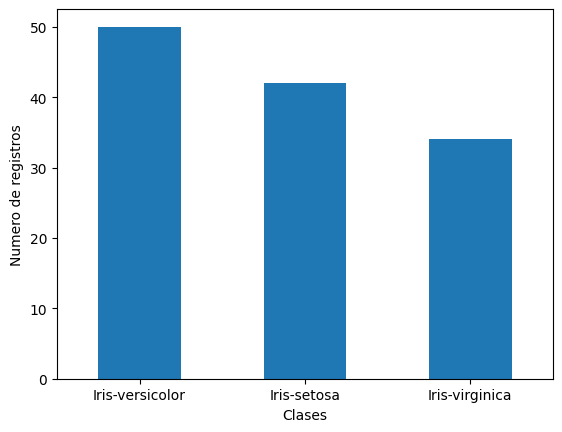

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Species'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(8))
#plt.title("Numero de registros por clase")
plt.xlabel("Clases")
plt.ylabel("Numero de registros");

Class=0, n=42 (33.333%)
Class=1, n=50 (39.683%)
Class=2, n=34 (26.984%)


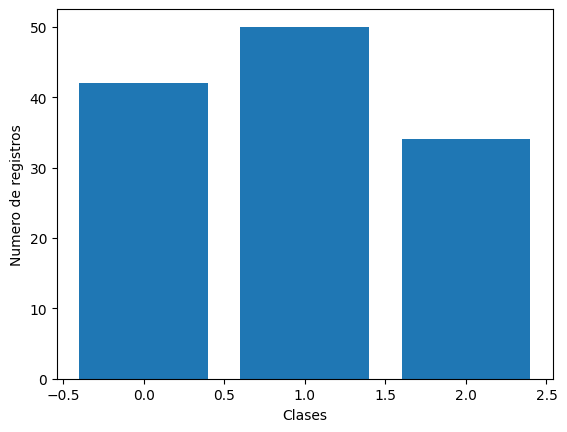

In [ ]:

# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = '/content/Iris2.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel("Clases")
pyplot.ylabel("Numero de registros");
pyplot.show()

# **inicio**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#import sklearn.external.joblib as extjoblib
import joblib
print('Libraries Imported')

Libraries Imported


In [ ]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# define the dataset location
url = '/content/Iris2.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
121,6.7,3.0,5.2,2.3,Iris-virginica
122,6.3,2.5,5.0,1.9,Iris-virginica
123,6.5,3.0,5.2,2.0,Iris-virginica
124,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# split into input and output elements
A, b = data[:, :-1], data[:, -1]

In [ ]:
print(A)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.0 1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1.0]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.0 2.0 3.

In [ ]:
# label encode the target variable
b = LabelEncoder().fit_transform(b)


In [ ]:
b

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# transform the dataset
X=A
y=b
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=50 (33.333%)
Class=1, n=50 (33.333%)
Class=2, n=50 (33.333%)


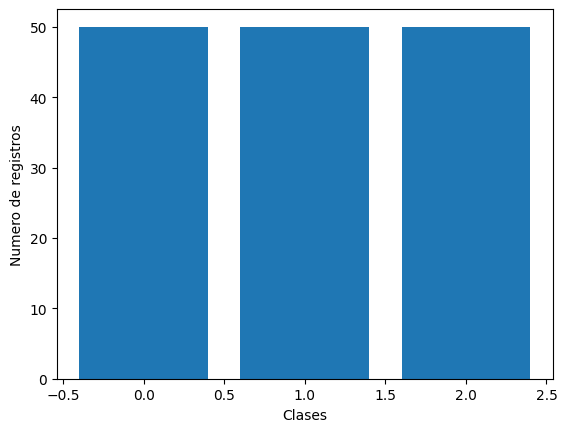

In [ ]:
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel("Clases")
pyplot.ylabel("Numero de registros")
pyplot.show()

In [ ]:
df.columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Class"]
print('Shape of the dataset: ' + str(df.shape))
print(df.head())

Shape of the dataset: (126, 5)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm        Class
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
factor = pd.factorize(df['Class'])
df.species = factor[0]
definitions = factor[1]
print(df.species.head(5))
print(definitions)

AttributeError: ignored

In [ ]:
print(X.shape, y.shape)

(150, 4) (150,)


# Training

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize
reversefactor = dict(zip(range(4),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['clases'], colnames=['variables']))

NameError: ignored

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


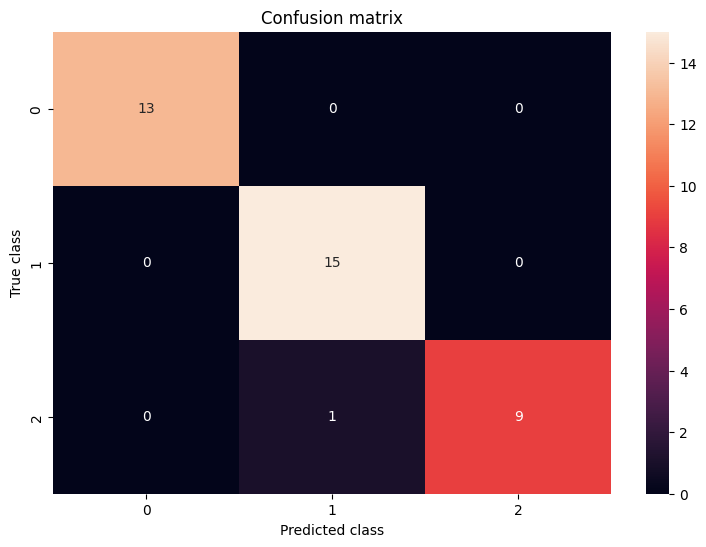

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
print(list(zip(df.columns[0:17], classifier.feature_importances_)))
joblib.dump(classifier, 'randomforestmodel.pkl')

[('SepalLengthCm', 0.13450951543453482), ('SepalWidthCm', 0.007878308646519044), ('PetalLengthCm', 0.4111149726309999), ('PetalWidthCm', 0.44649720328794623)]


['randomforestmodel.pkl']

In [ ]:
# make predictions using random forest for classification
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=17, n_informative=15, n_redundant=5, random_state=3)
# define the model
#model = RandomForestClassifier()
# fit the model on the whole dataset
#model.fit(X, y)
# make a single clasification
row = [[5.4,3.5,5.7,1.4]]
yhat = classifier.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


# **Feature importance**

Feature: 0, Score: 0.09970
Feature: 1, Score: 0.01983
Feature: 2, Score: 0.46508
Feature: 3, Score: 0.41538


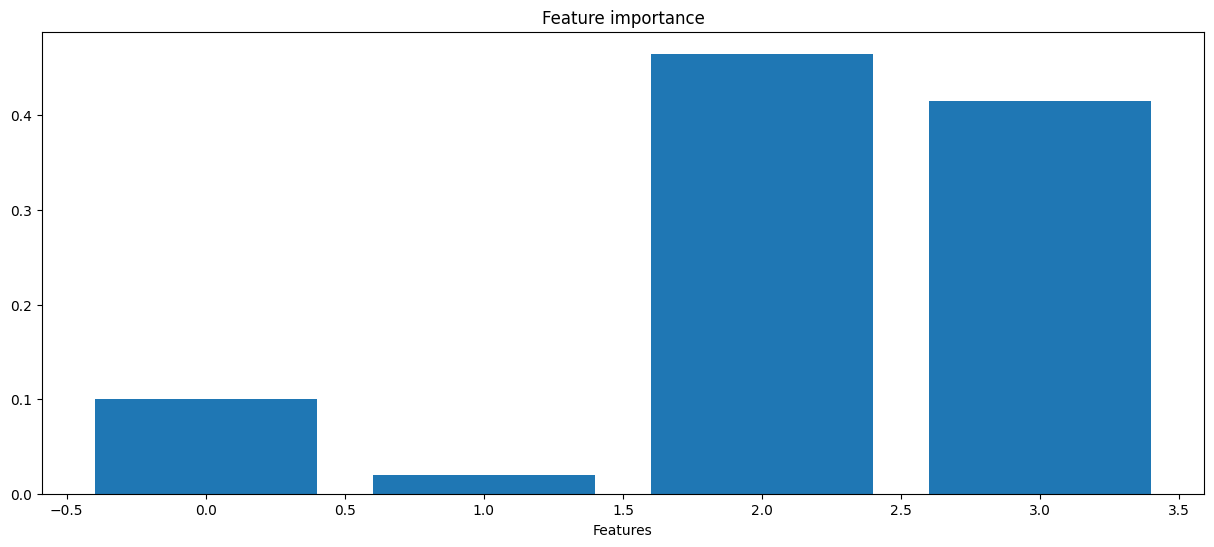

In [ ]:
# random forest for feature importance on a classification problem
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
#from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.figure(figsize=(15, 6))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature importance")
pyplot.xlabel('Features')
pyplot.show()